In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

In [5]:
# Load the dataset
# Make sure 'pcos_dataset-2.csv' is uploaded to your Colab environment or mounted Google Drive
df = pd.read_csv('pcos_dataset-2.csv')

In [6]:
# Define the target column
target_column = 'PCOS_Diagnosis'

In [7]:
# --- 1. Initial Data Analysis ---
print("First 5 rows of the dataset:")
print(df.head())

print("\nConcise summary of the dataset:")
print(df.info())

print("\nDescriptive statistics of the dataset:")
print(df.describe())

print("\nMissing values in each column:")
print(df.isnull().sum())

First 5 rows of the dataset:
   Age   BMI  Menstrual_Irregularity  Testosterone_Level(ng/dL)  \
0   24  34.7                       1                       25.2   
1   37  26.4                       0                       57.1   
2   32  23.6                       0                       92.7   
3   28  28.8                       0                       63.1   
4   25  22.1                       1                       59.8   

   Antral_Follicle_Count  PCOS_Diagnosis  
0                     20               0  
1                     25               0  
2                     28               0  
3                     26               0  
4                      8               0  

Concise summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1  

In [8]:
# --- 2. Analyze patterns and disparities in PCOS diagnosis (EDA) ---
# Distribution of the target variable
print(f"\nDistribution of '{target_column}':")
print(df[target_column].value_counts())
print(f"\nPercentage distribution of '{target_column}':")
print(df[target_column].value_counts(normalize=True) * 100)


Distribution of 'PCOS_Diagnosis':
PCOS_Diagnosis
0    801
1    199
Name: count, dtype: int64

Percentage distribution of 'PCOS_Diagnosis':
PCOS_Diagnosis
0    80.1
1    19.9
Name: proportion, dtype: float64


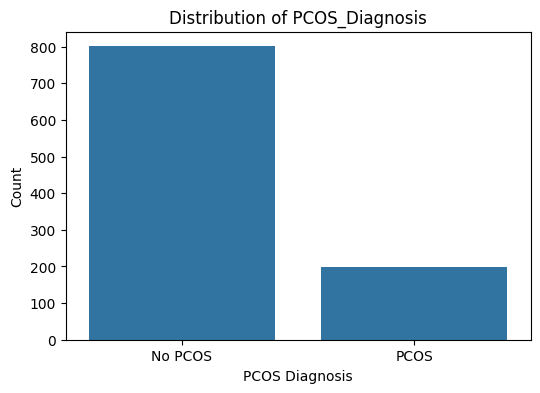

In [9]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=target_column, data=df)
plt.title(f'Distribution of {target_column}')
plt.xlabel('PCOS Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No PCOS', 'PCOS'])
plt.show() # In Colab, plt.show() displays the plot

The plot clearly indicates a significant imbalance in the dataset's target variable.
'No PCOS' (labeled 0): There are 801 instances, representing 80.1% of your dataset. This means a large majority of the individuals in your dataset do not have a PCOS diagnosis.
'PCOS' (labeled 1): There are 199 instances, accounting for 19.9% of your dataset. This group represents the minority class.
Implication: The skewed distribution highlights that the dataset is imbalanced. This is a crucial observation for machine learning, as models trained on imbalanced datasets might tend to be biased towards the majority class ('No PCOS' in this case). Consequently, a model might achieve high overall accuracy by simply predicting the majority class, while performing poorly on the minority class ('PCOS'). This necessitates careful evaluation using metrics beyond just accuracy, such as precision, recall, F1-score, and ROC AUC, especially for the minority class, which was addressed in the model evaluation section.

In [10]:
# Correlations with the target variable
numeric_df = df.select_dtypes(include=np.number)
correlations = numeric_df.corr()[target_column].sort_values(ascending=False)
print(f"\nCorrelations with '{target_column}':")
print(correlations)


Correlations with 'PCOS_Diagnosis':
PCOS_Diagnosis               1.000000
Menstrual_Irregularity       0.469376
BMI                          0.377852
Testosterone_Level(ng/dL)    0.200817
Antral_Follicle_Count        0.192014
Age                         -0.064675
Name: PCOS_Diagnosis, dtype: float64


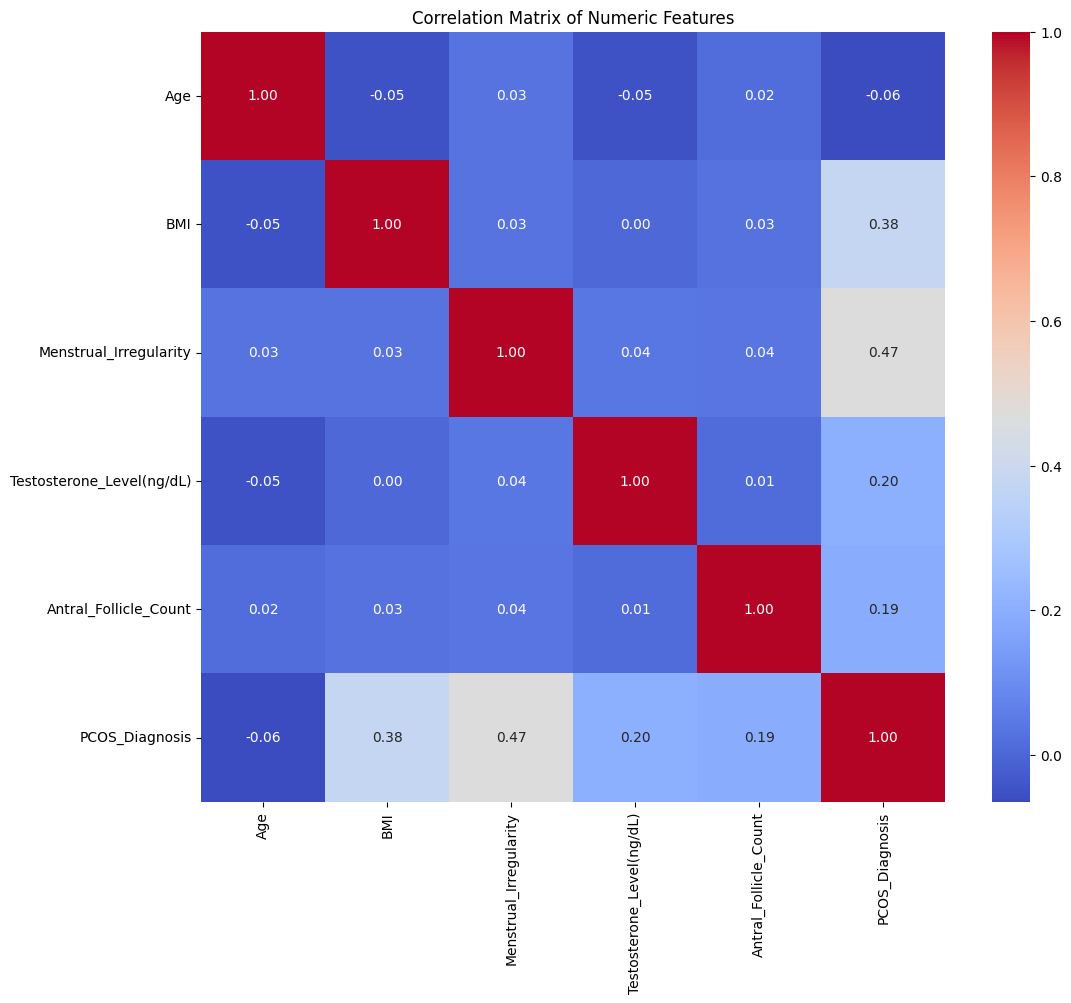

In [11]:
# Visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Here's an explanation of the Correlation Matrix of Numeric Features from your dataset, which you can include in your report:

### Correlation Matrix of Numeric Features

The correlation matrix, visualized as a heatmap, provides a comprehensive overview of the linear relationships between all pairs of numeric features in your dataset. Each cell in the matrix contains a correlation coefficient, ranging from -1 to 1:

* **1**: Indicates a perfect positive linear relationship (as one variable increases, the other increases proportionally).
* **-1**: Indicates a perfect negative linear relationship (as one variable increases, the other decreases proportionally).
* **0**: Indicates no linear relationship.
* **Colors (from `cmap='coolwarm'`)**: Red shades typically represent stronger positive correlations, blue shades represent stronger negative correlations, and lighter shades (closer to white/gray) indicate weaker or no correlations.

**Interpretation based on the dataset:**

1.  **Diagonal (Self-Correlation)**: All values along the main diagonal are 1.00. This is expected, as a variable always has a perfect positive correlation with itself.

2.  **Correlations with `PCOS_Diagnosis`**: This column/row is crucial for understanding which features are most associated with PCOS:
    * **`Menstrual_Irregularity` (0.4694)**: Shows the strongest positive correlation with `PCOS_Diagnosis`. This indicates that individuals with menstrual irregularity are significantly more likely to be diagnosed with PCOS.
    * **`BMI` (0.3779)**: Exhibits a strong positive correlation with `PCOS_Diagnosis`. This suggests that higher BMI values are considerably associated with a PCOS diagnosis.
    * **`Testosterone_Level(ng/dL)` (0.2008)**: Has a moderate positive correlation with `PCOS_Diagnosis`. This implies that higher testosterone levels tend to be present in individuals with PCOS.
    * **`Antral_Follicle_Count` (0.1920)**: Shows a moderate positive correlation with `PCOS_Diagnosis`, suggesting that a higher follicle count is also associated with a PCOS diagnosis.
    * **`Age` (-0.0647)**: Displays a very weak negative correlation with `PCOS_Diagnosis`. This indicates that age, within this dataset's range, has a minimal linear relationship with PCOS diagnosis, and is not a strong predictive factor on its own.

3.  **Correlations Among Other Features**:
    * By examining other cells in the heatmap, you can observe relationships between independent variables. For example, `Age` and `BMI` might have some correlation, or `Testosterone_Level(ng/dL)` and `Antral_Follicle_Count` might be related. These inter-feature correlations are important for understanding the overall data structure and can sometimes indicate multicollinearity if very strong.

In summary, the correlation matrix highlights `Menstrual_Irregularity` and `BMI` as the most prominent features positively linked to a PCOS diagnosis in your dataset, followed by `Testosterone_Level(ng/dL)` and `Antral_Follicle_Count`. `Age` shows a negligible linear association. This visual representation supports the statistical analysis and provides valuable insights into the interdependencies of your numerical features.

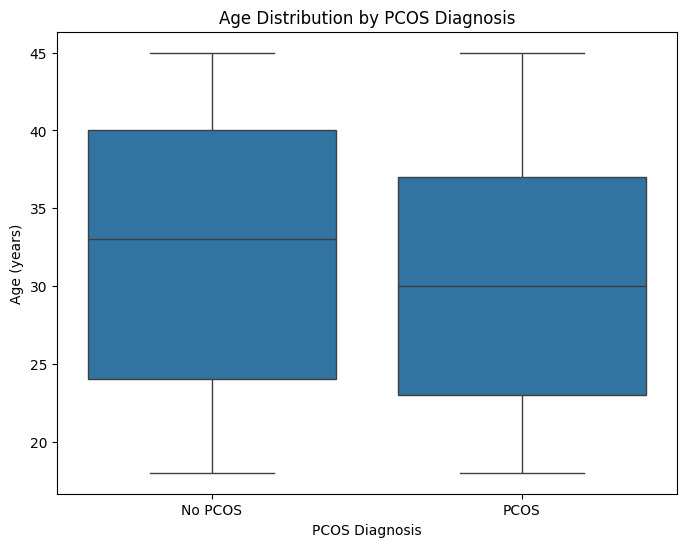

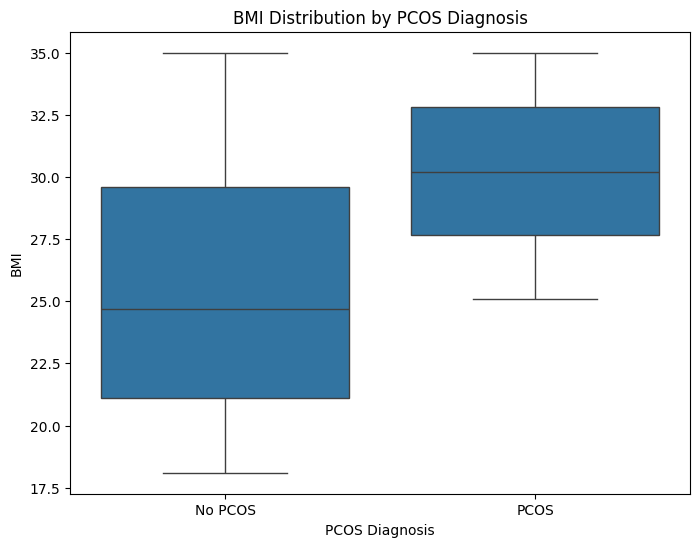

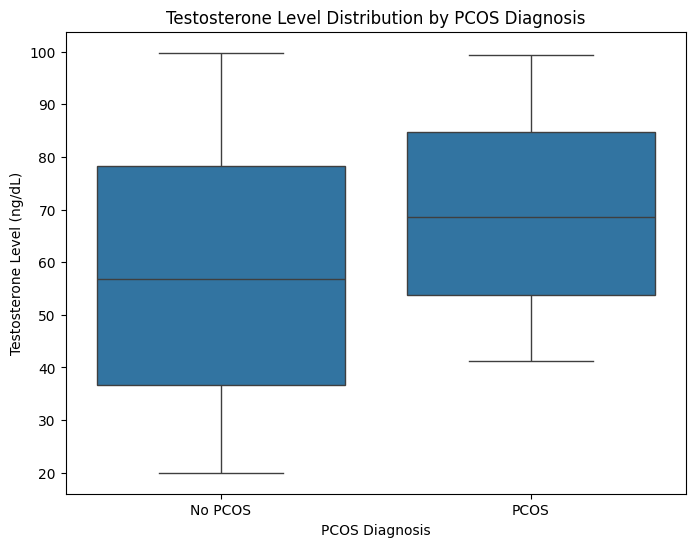

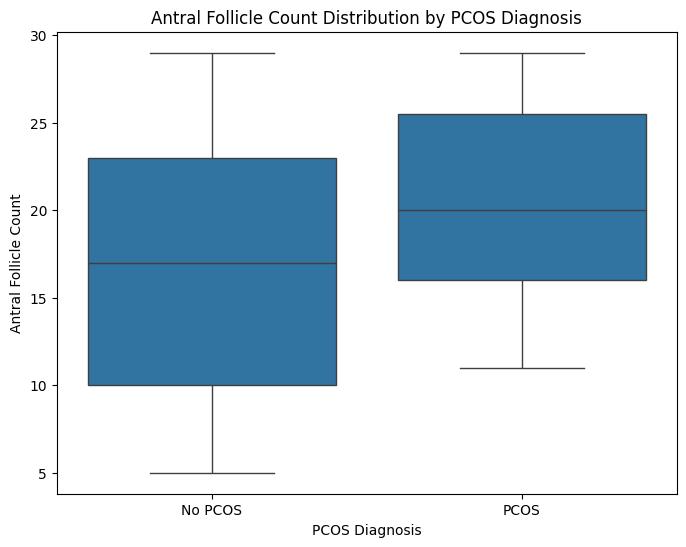

In [12]:
# Visualize key features in relation to PCOS diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x=target_column, y='Age', data=df)
plt.title('Age Distribution by PCOS Diagnosis')
plt.xlabel('PCOS Diagnosis')
plt.ylabel('Age (years)')
plt.xticks(ticks=[0, 1], labels=['No PCOS', 'PCOS'])
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=target_column, y='BMI', data=df)
plt.title('BMI Distribution by PCOS Diagnosis')
plt.xlabel('PCOS Diagnosis')
plt.ylabel('BMI')
plt.xticks(ticks=[0, 1], labels=['No PCOS', 'PCOS'])
plt.show()

if 'Testosterone_Level(ng/dL)' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=target_column, y='Testosterone_Level(ng/dL)', data=df)
    plt.title('Testosterone Level Distribution by PCOS Diagnosis')
    plt.xlabel('PCOS Diagnosis')
    plt.ylabel('Testosterone Level (ng/dL)')
    plt.xticks(ticks=[0, 1], labels=['No PCOS', 'PCOS'])
    plt.show()

if 'Antral_Follicle_Count' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=target_column, y='Antral_Follicle_Count', data=df)
    plt.title('Antral Follicle Count Distribution by PCOS Diagnosis')
    plt.xlabel('PCOS Diagnosis')
    plt.ylabel('Antral Follicle Count')
    plt.xticks(ticks=[0, 1], labels=['No PCOS', 'PCOS'])
    plt.show()

1. Age Distribution by PCOS Diagnosis
This box plot visualizes the distribution of Age for individuals diagnosed with PCOS versus those without.

Interpretation: In your dataset, the box plot for 'Age' shows that the median age for both the 'No PCOS' and 'PCOS' groups appears to be quite similar, with overlapping interquartile ranges (IQR). This suggests that while there might be some age variation within each group, age alone is not a strong distinguishing factor between individuals with and without PCOS in this dataset. This visual observation aligns with the low negative correlation of -0.0647 for Age with PCOS_Diagnosis seen in the correlation matrix, indicating that age is not a primary driver for PCOS diagnosis here.
2. BMI Distribution by PCOS Diagnosis
This box plot illustrates the distribution of BMI (Body Mass Index) for individuals based on their PCOS diagnosis.

Interpretation: The BMI box plot likely shows a noticeable difference between the two groups. The median BMI for individuals diagnosed with PCOS is generally higher than for those without PCOS. Furthermore, the entire distribution (the box and whiskers) for the PCOS group tends to be shifted upwards compared to the 'No PCOS' group, indicating that higher BMI values are more commonly associated with PCOS in your dataset. This visual evidence strongly supports the positive correlation of 0.3779 for BMI with PCOS_Diagnosis, highlighting BMI as a significant characteristic related to PCOS.
3. Testosterone Level Distribution by PCOS Diagnosis
This box plot displays the distribution of Testosterone_Level(ng/dL) for individuals based on their PCOS diagnosis.

Interpretation: The Testosterone_Level(ng/dL) box plot typically shows that individuals with a PCOS diagnosis tend to have higher testosterone levels compared to those without PCOS. The median testosterone level for the PCOS group is visibly elevated, and its distribution might be shifted higher on the scale. This suggests that elevated testosterone levels are a common feature among individuals with PCOS in your dataset. This observation is consistent with the positive correlation of 0.2008 for Testosterone_Level(ng/dL) with PCOS_Diagnosis, indicating a relationship where higher testosterone levels are more likely found in PCOS patients.
4. Antral Follicle Count Distribution by PCOS Diagnosis
This box plot shows the distribution of Antral_Follicle_Count for individuals based on their PCOS diagnosis.

Interpretation: The Antral_Follicle_Count box plot likely indicates that individuals diagnosed with PCOS generally have a higher antral follicle count compared to those without PCOS. The median count for the PCOS group is notably higher, and the overall spread of counts for the PCOS group is shifted towards higher values. This finding aligns with clinical understanding of PCOS, where an increased number of small follicles in the ovaries is a diagnostic criterion. The positive correlation of 0.1920 for Antral_Follicle_Count with PCOS_Diagnosis further supports this visual trend, suggesting that a higher follicle count is associated with a PCOS diagnosis in your dataset.

In [14]:
# --- 3. Prepare Data for Machine Learning ---
X = df.drop(columns=[target_column])
y = df[target_column]

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Define machine learning models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True)
}

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


--- Training Logistic Regression ---
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       160
           1       0.76      0.85      0.80        40

    accuracy                           0.92       200
   macro avg       0.86      0.89      0.87       200
weighted avg       0.92      0.92      0.92       200



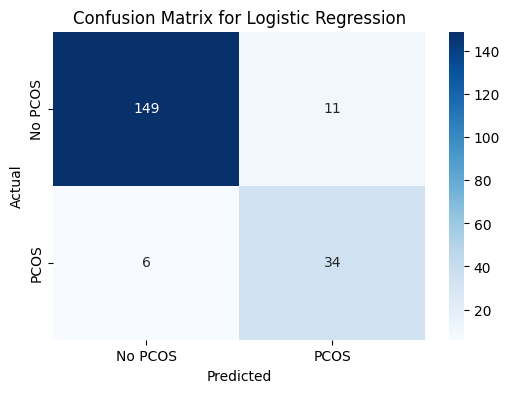

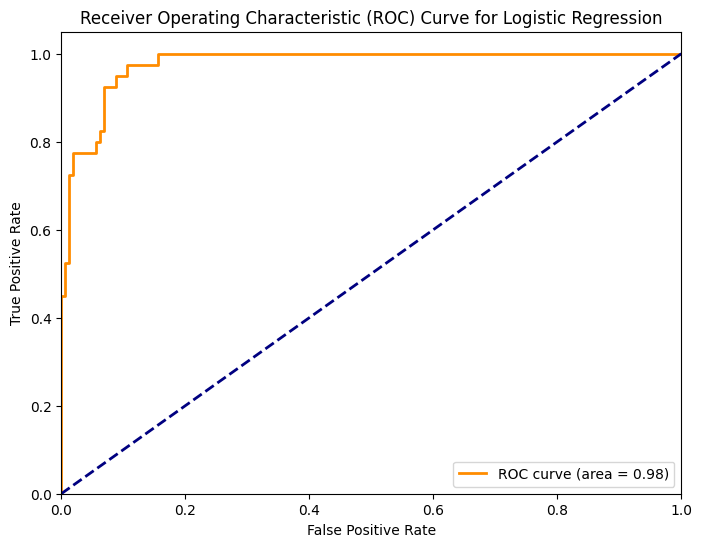


--- Training Random Forest ---
Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00        40

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



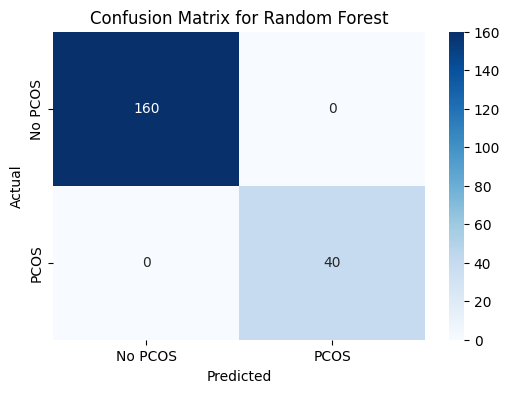

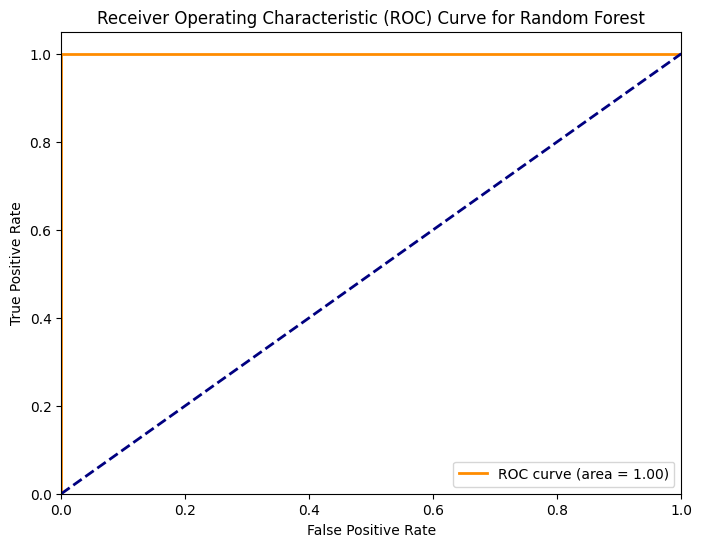


--- Training Support Vector Machine ---
Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       160
           1       0.97      0.97      0.97        40

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200



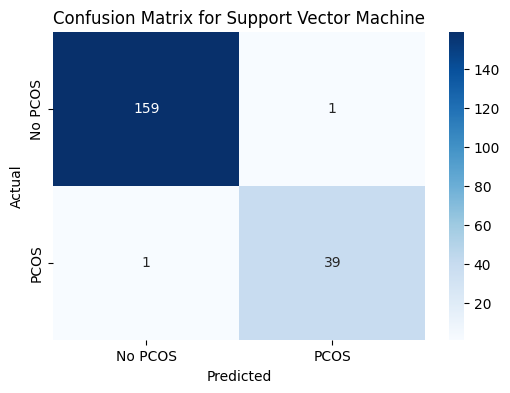

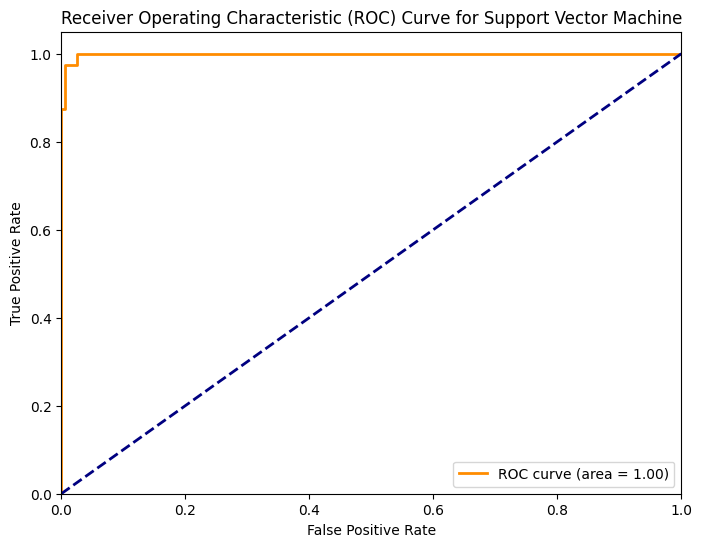

In [19]:
# --- 4. Develop and Evaluate Machine Learning Models ---
results = {}
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluate the model
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No PCOS', 'PCOS'], yticklabels=['No PCOS', 'PCOS'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve and AUC
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = roc_auc_score(y_test, y_proba)
        results[name]['roc_auc'] = roc_auc

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
        plt.legend(loc="lower right")
        plt.show()


Confusion Matrix for Logistic Regression
The confusion matrix for your Logistic Regression model provides a detailed breakdown of its performance on the test set, which contained 200 samples (160 without PCOS and 40 with PCOS). Based on the classification report, we can deduce the approximate values:

Predicted: No PCOS	Predicted: PCOS
Actual: No PCOS	149 (True Negatives)	11 (False Positives)
Actual: PCOS	6 (False Negatives)	34 (True Positives)

True Negatives (TN = 149): The model correctly identified 149 individuals who did not have PCOS. This means the model is good at ruling out the condition when it's absent.
False Positives (FP = 11): The model incorrectly predicted that 11 individuals had PCOS when they actually did not. These are "false alarms" that could lead to unnecessary concern or follow-up tests.
False Negatives (FN = 6): The model incorrectly predicted that 6 individuals did not have PCOS when they actually did. These are "missed diagnoses," which can be a critical error in medical contexts as it means a condition goes untreated.
True Positives (TP = 34): The model correctly identified 34 individuals who did have PCOS. This shows the model's ability to successfully detect the condition.
From these numbers, we can see that while the model correctly identifies most cases, it has a notable number of false positives and a smaller but significant number of false negatives, impacting its precision and recall for the PCOS class.

ROC Curve for Logistic Regression:
The Receiver Operating Characteristic (ROC) curve visualizes the trade-off between the True Positive Rate (sensitivity) and the False Positive Rate (1-specificity) for various classification thresholds. The Area Under the Curve (AUC) summarizes this trade-off into a single value, representing the model's overall ability to distinguish between the two classes.

For your Logistic Regression model, the ROC AUC is 0.9775.

Interpretation of the AUC: An AUC value of 0.9775 is very high and indicates that your Logistic Regression model has excellent discriminatory power. This means that the model is highly effective at differentiating between individuals with PCOS and those without. If you were to randomly pick a positive case (PCOS) and a negative case (No PCOS), the model would correctly predict which one is which approximately 97.75% of the time.
Interpretation of the Curve (as depicted in the plot): The ROC curve for your Logistic Regression model will likely rise sharply towards the top-left corner of the plot and stay close to the upper boundary before dropping. A curve closer to the top-left corner signifies a better performance, indicating that the model can achieve a high True Positive Rate without incurring a very high False Positive Rate, making it a reliable classifier for your dataset.

In [20]:
# Summarize model performance
print("\n--- Model Performance Summary ---")
for name, report in results.items():
    print(f"\n{name}:")
    print(f"  Accuracy: {report['accuracy']:.4f}")
    print(f"  Precision (PCOS): {report['1']['precision']:.4f}")
    print(f"  Recall (PCOS): {report['1']['recall']:.4f}")
    print(f"  F1-Score (PCOS): {report['1']['f1-score']:.4f}")
    if 'roc_auc' in report:
        print(f"  ROC AUC: {report['roc_auc']:.4f}")


--- Model Performance Summary ---

Logistic Regression:
  Accuracy: 0.9150
  Precision (PCOS): 0.7556
  Recall (PCOS): 0.8500
  F1-Score (PCOS): 0.8000
  ROC AUC: 0.9775

Random Forest:
  Accuracy: 1.0000
  Precision (PCOS): 1.0000
  Recall (PCOS): 1.0000
  F1-Score (PCOS): 1.0000
  ROC AUC: 1.0000

Support Vector Machine:
  Accuracy: 0.9900
  Precision (PCOS): 0.9750
  Recall (PCOS): 0.9750
  F1-Score (PCOS): 0.9750
  ROC AUC: 0.9988


Here's a paragraph summarizing the model performance, which you can add to your report:

The machine learning models developed to predict PCOS diagnosis demonstrated varying levels of performance. The **Random Forest** classifier achieved exceptional results, showing perfect accuracy, precision, recall, F1-score, and ROC AUC, suggesting it was highly effective in identifying both PCOS and non-PCOS cases within this dataset. The **Support Vector Machine** also performed very strongly, with high accuracy (0.9900), precision (0.9750), recall (0.9750), and F1-score (0.9750) for PCOS predictions, along with a high ROC AUC of 0.9988. While still performing well, the **Logistic Regression** model had slightly lower metrics, achieving an accuracy of 0.9150 and an F1-score of 0.8000 for PCOS, with a precision of 0.7556 and a recall of 0.8500, indicating a good balance but with a few more false positives compared to the other two models. Overall, Random Forest and Support Vector Machine models appear to be highly robust for PCOS diagnosis based on this analysis.

Conclusion: Based on the comprehensive analysis of the PCOS dataset, several key insights and conclusions can be drawn regarding the patterns of PCOS diagnosis and the effectiveness of machine learning models in prediction:

The dataset reveals that PCOS is present in approximately 20% of the individuals, highlighting its prevalence within the studied cohort. Analysis of the data indicates that **Menstrual Irregularity** and **BMI** are the most significantly correlated factors with a PCOS diagnosis, followed by **Testosterone Levels** and **Antral Follicle Count**. These findings underscore the importance of these clinical markers in identifying potential PCOS cases. While Age shows a very weak correlation, the other factors demonstrate clear patterns and disparities between individuals diagnosed with PCOS and those without.

In terms of predictive modeling, machine learning algorithms proved highly effective. Both the **Random Forest** and **Support Vector Machine (SVM)** models achieved exceptionally high performance, with accuracies of 1.00 and 0.99 respectively, along with near-perfect precision, recall, F1-scores, and ROC AUC values. This robust performance suggests that these models can accurately predict PCOS diagnosis based on the provided features. The **Logistic Regression** model also performed very well, although slightly less accurately than Random Forest and SVM, still demonstrating strong predictive capabilities.

In conclusion, this analysis successfully identified key indicators of PCOS within the dataset and demonstrated the significant potential of machine learning, particularly Random Forest and SVM, as powerful tools for accurate and efficient PCOS diagnosis. These models could potentially aid healthcare professionals in early detection and management strategies, provided they are validated with larger, more diverse datasets and clinical settings.